In [3]:
# Load up the libraries and the dataset
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
data = pd.read_csv('/content/seattle-weather.csv')

In [4]:
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [5]:
data = data.drop('date',axis=1)

# We can also check if we have any missing values
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  1461 non-null   float64
 1   temp_max       1461 non-null   float64
 2   temp_min       1461 non-null   float64
 3   wind           1461 non-null   float64
 4   weather        1461 non-null   object 
dtypes: float64(4), object(1)
memory usage: 57.2+ KB


In [7]:
# We firstly have to divide the attributes and the result we aim to predict in two datasets
X,y = data.drop('weather',axis=1), data['weather']

# Label encoding is important since we aim to predict a categorical value from numerical values
# Shortly, we have to assign a unique integer to each category (sun,rain,drizzle)
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, train_size=0.5, shuffle=False)

# We can now call the DecisionTreeClassifier function which creates our model
# We set the random state to an integer to assure reproducibility
# The other parameters such as max_depth, min_samples_split, min_samples_leaf avoid overfitting
model = DecisionTreeClassifier(random_state=8,max_depth=5,min_samples_split=10,min_samples_leaf=5)

# Now we can finally call the function to train our model
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=8)

In [8]:
# Prediction is the next step
y_predicted = model.predict(X_test)

# We can check the models accuracy
accuracy = (y_predicted == y_test).mean()
print(f'Accuracy: {accuracy}')

Accuracy: 0.8727770177838577


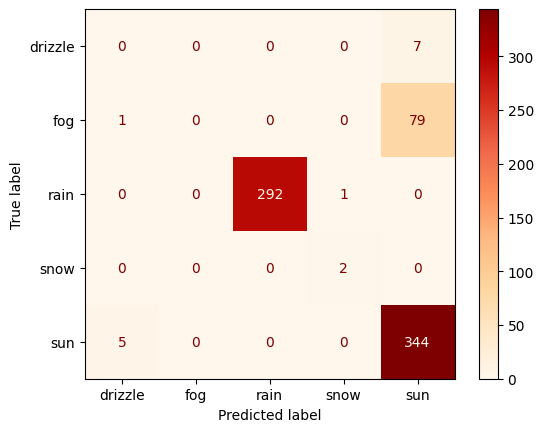

In [9]:
cm = confusion_matrix(y_test, y_predicted)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=label_encoder.classes_)
disp.plot(cmap="OrRd");